In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load Data 

In [3]:
df = pd.read_csv('D:/DataScience/IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [6]:
df['target'] = df['sentiment'].map({'positive':1,'negative':0})

In [7]:
df = df[['review','target']]
df.head()

,review,target
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [8]:
df.target.value_counts()

1    25000
0    25000
Name: target, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(df['review'],df['target'],test_size=0.30,random_state=49)

### Pre-Processing

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [12]:
vocab_size = 10000
max_len = 120
emd_dim = 32

In [13]:
list_sequence = x_train.tolist()

In [14]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token='<OOV>')

In [15]:
tokenizer.fit_on_texts(list_sequence)

In [16]:
len(tokenizer.word_index)

105694

In [17]:
tokized_list = tokenizer.texts_to_sequences(list_sequence)

In [18]:
from tensorflow.keras.preprocessing.sequence  import pad_sequences

In [19]:
X_t = paded_list = pad_sequences(tokized_list,maxlen=max_len)

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

### Model Definition - Single Layer LSTM

In [20]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,emd_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 337,037
Trainable params: 337,037
Non-trainable params: 0
_________________________________________________________________


In [30]:
batch_size = 264
epochs = 3

history1 = model1.fit(X_t,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 28000 samples, validate on 7000 samples
Epoch 1/3
28000/28000 [==============================] - 64s 2ms/sample - loss: 0.1759 - acc: 0.9353 - val_loss: 0.4041 - val_acc: 0.8607
Epoch 2/3
28000/28000 [==============================] - 60s 2ms/sample - loss: 0.1478 - acc: 0.9467 - val_loss: 0.3725 - val_acc: 0.8603
Epoch 3/3
28000/28000 [==============================] - 60s 2ms/sample - loss: 0.1212 - acc: 0.9584 - val_loss: 0.4463 - val_acc: 0.8580


In [33]:
history1.history

{'loss': [0.17591031528583595, 0.14779215161289488, 0.12119834839765514],
 'acc': [0.93532145, 0.94675, 0.95842856],
 'val_loss': [0.4040522521223341, 0.37252527706963673, 0.4462994932787759],
 'val_acc': [0.86071426, 0.8602857, 0.858]}

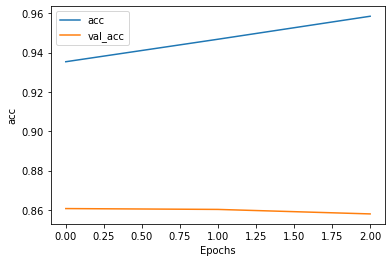

In [34]:
plot_graphs(history1, 'acc')

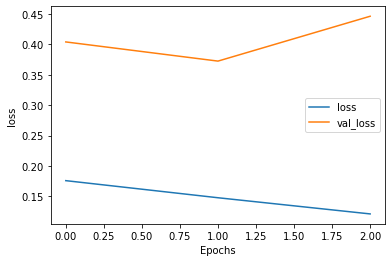

In [35]:
plot_graphs(history1, 'loss')

### Model Definition - Multi Layer LSTM 

In [24]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,emd_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 120, 128)          49664     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 415,105
Trainable params: 415,105
Non-trainable params: 0
_________________________________________________________________


In [36]:
batch_size = 264
epochs = 3
history2 = model2.fit(X_t,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 28000 samples, validate on 7000 samples
Epoch 1/3
28000/28000 [==============================] - 111s 4ms/sample - loss: 0.1347 - acc: 0.9521 - val_loss: 0.4888 - val_acc: 0.8540
Epoch 2/3
28000/28000 [==============================] - 108s 4ms/sample - loss: 0.1007 - acc: 0.9663 - val_loss: 0.4434 - val_acc: 0.8519
Epoch 3/3
28000/28000 [==============================] - 110s 4ms/sample - loss: 0.0793 - acc: 0.9738 - val_loss: 0.5095 - val_acc: 0.8516


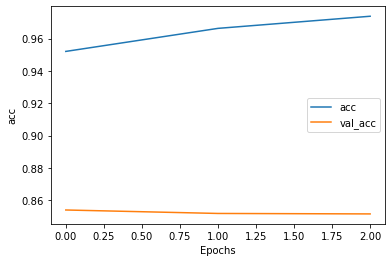

In [37]:
plot_graphs(history2, 'acc')

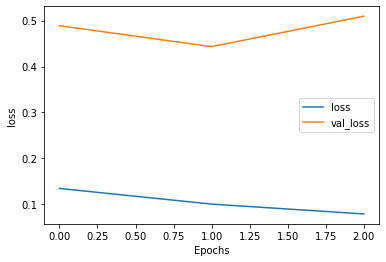

In [38]:
plot_graphs(history2, 'loss')

### Model -  GRU

In [39]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,emd_dim,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [40]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 32)           320000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                12480     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 332,877
Trainable params: 332,877
Non-trainable params: 0
_________________________________________________________________


In [42]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
batch_size = 264
epochs = 3
history3 = model3.fit(X_t,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 28000 samples, validate on 7000 samples
Epoch 1/3
28000/28000 [==============================] - 56s 2ms/sample - loss: 0.6154 - acc: 0.6454 - val_loss: 0.4407 - val_acc: 0.8139
Epoch 2/3
28000/28000 [==============================] - 50s 2ms/sample - loss: 0.3140 - acc: 0.8679 - val_loss: 0.3258 - val_acc: 0.8624
Epoch 3/3
28000/28000 [==============================] - 48s 2ms/sample - loss: 0.2316 - acc: 0.9109 - val_loss: 0.3423 - val_acc: 0.8573


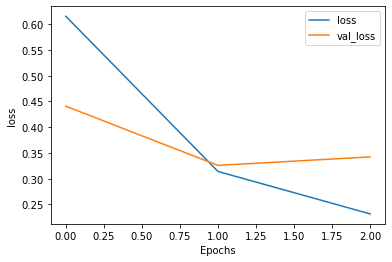

In [44]:
plot_graphs(history3, 'loss')

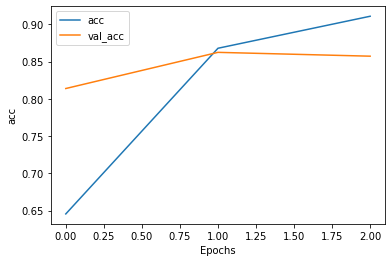

In [45]:
plot_graphs(history3, 'acc')